## Install GPAW

just work on Linux, python=3.10

```sh
conda install -c conda-forge gcc=12 gxx=12 libstdcxx-ng=12
conda install -c conda-forge  openmpi openmp blas libxc scalapack fftw libvdwxc elpa
pip install --upgrade git+https://gitlab.com/ase/ase.git@master
pip install --upgrade  git+https://gitlab.com/gpaw/gpaw.git 
```

**Test**
Run in env `py310ase`

```sh
gpaw test

gpaw install-data --register ~/PAWDATA
```

NOTE:
- [fix GPAW_SETUP_PATH](https://jensj.gitlab.io/gpaw-2021-talk/slides/slide-09.html)

In [1]:
from ase.visualize import view

## Simple properties with single DFT Calculations

### Energy and forces

Two of the most important quantities we are interested in are the total energy and the forces on the atoms.
- Define a calculator and attach it to an `ase.Atoms` object so that `ase` knows how to get the data
- Run DFT calculation

Here is an example of getting the energy and forces from a CO molecule. 

In [17]:
from ase import Atoms, Atom
from gpaw import GPAW, PW, FermiDirac

# Define molecule
co = Atoms([Atom('C', [0, 0, 0]),
            Atom('O', [1.2, 0, 0])],
           cell=(6., 6., 6.), )

# gpaw calculator:
calc = GPAW(mode=PW(350),       # planewave cutoff  350
            xc='PBE',             # the exchange-correlation functional
            nbands=6,             # number of bands
            occupations={'name': 'methfessel-paxton', 'width': 0.01, 'order': 0},    # Methfessel-Paxton smearing
            txt='molecules/simple_co.out'    # output file
            )
co.calc = calc


print('energy = {0} eV'.format(co.get_potential_energy()))
print(co.get_forces())

## write restart file
co.calc.write('molecules/simple_co.gpw')

energy = -10.991823929043324 eV
[[ 3.69941449e+00  0.00000000e+00  0.00000000e+00]
 [-3.71185076e+00  5.07060730e-30  0.00000000e+00]]


Note that the forces are only along the x-axis, which is along the molecular axis. The forces in this case are very high, indicating that this geometry is not close to the ground state geometry.We need to minimize system.

#### Convergence with size of unit cell

Calculate energies with different sizes of unit cell. The reason that the unit cell affects the total energy is that it can change the distribution of electrons in the molecule.

In [34]:
# Define molecule
atoms = Atoms([Atom('C', [0, 0, 0]),
            Atom('O', [1.2, 0, 0])],)

L = [4, 5, 6, 8, 10]
energies = []
for a in L:
    atoms.set_cell([a, a, a], scale_atoms=False)
    atoms.center()
    calc = GPAW(mode=PW(350),       # planewave cutoff  350
            xc='PBE')
    atoms.calc = calc
    energies.append(atoms.get_potential_energy())

print(energies)


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  22.8.1b1
 |___|_|             

User:   tha@Tha-DELL
Date:   Thu Jan 26 23:00:06 2023
Arch:   x86_64
Pid:    3289
CWD:    /mnt/c/DATA/work/w23_DFT/ASE_kitchin_book
Python: 3.10.8
gpaw:   /home/tha/app/miniconda3/envs/py310ase/lib/python3.10/site-packages/gpaw
_gpaw:  /home/tha/app/miniconda3/envs/py310ase/lib/python3.10/site-packages/
        _gpaw.cpython-310-x86_64-linux-gnu.so
ase:    /home/tha/app/miniconda3/envs/py310ase/lib/python3.10/site-packages/ase (version 3.23.0b1)
numpy:  /home/tha/app/miniconda3/envs/py310ase/lib/python3.10/site-packages/numpy (version 1.24.1)
scipy:  /home/tha/app/miniconda3/envs/py310ase/lib/python3.10/site-packages/scipy (version 1.10.0)
libxc:  5.2.3
units:  Angstrom and eV
cores: 1
OpenMP: False
OMP_NUM_THREADS: 1

Input parameters:
  mode: {ecut: 350.0,
         name: pw}
  xc: PBE

Timing:                              incl.     excl.
---------------------------

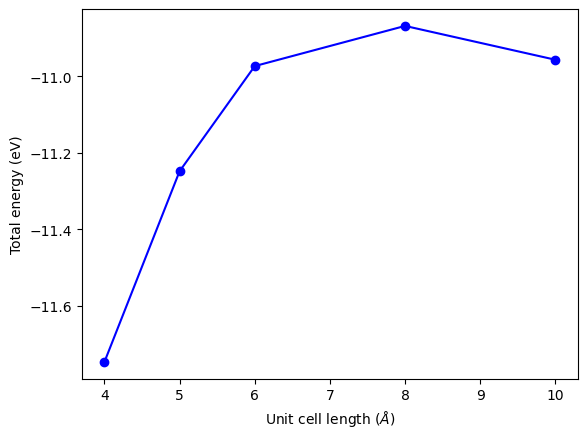

In [35]:
import matplotlib.pyplot as plt
plt.plot(L, energies, 'bo-')
plt.xlabel('Unit cell length ($\AA$)')
plt.ylabel('Total energy (eV)')
plt.show()

#### Convergence of energy Cutoff


In [38]:
# Define molecule
atoms = Atoms([Atom('C', [0, 0, 0]),
            Atom('O', [1.2, 0, 0])],
           cell=(6., 6., 6.))
atoms.center()

ENCUTS = [300, 350, 400, 450, 500, 600]
energies = []
for en in ENCUTS:
    calc = GPAW(mode=PW(ecut=en), xc='PBE')
    atoms.calc = calc
    energies.append(atoms.get_potential_energy())


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  22.8.1b1
 |___|_|             

User:   tha@Tha-DELL
Date:   Thu Jan 26 23:02:01 2023
Arch:   x86_64
Pid:    3289
CWD:    /mnt/c/DATA/work/w23_DFT/ASE_kitchin_book
Python: 3.10.8
gpaw:   /home/tha/app/miniconda3/envs/py310ase/lib/python3.10/site-packages/gpaw
_gpaw:  /home/tha/app/miniconda3/envs/py310ase/lib/python3.10/site-packages/
        _gpaw.cpython-310-x86_64-linux-gnu.so
ase:    /home/tha/app/miniconda3/envs/py310ase/lib/python3.10/site-packages/ase (version 3.23.0b1)
numpy:  /home/tha/app/miniconda3/envs/py310ase/lib/python3.10/site-packages/numpy (version 1.24.1)
scipy:  /home/tha/app/miniconda3/envs/py310ase/lib/python3.10/site-packages/scipy (version 1.10.0)
libxc:  5.2.3
units:  Angstrom and eV
cores: 1
OpenMP: False
OMP_NUM_THREADS: 1

Input parameters:
  mode: {ecut: 300.0,
         name: pw}
  xc: PBE

Timing:                              incl.     excl.
---------------------------

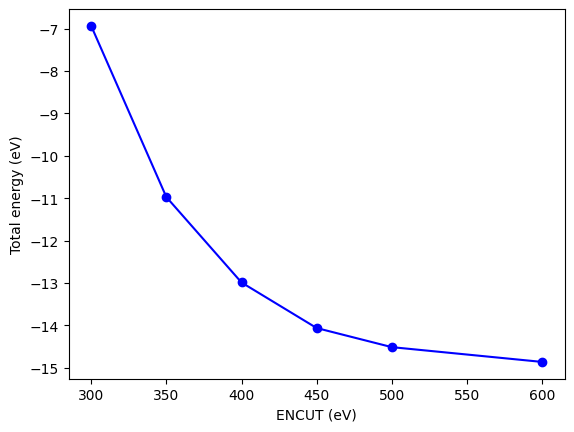

In [39]:
import matplotlib.pyplot as plt
plt.plot(ENCUTS, energies, 'bo-')
plt.xlabel('ENCUT (eV)')
plt.ylabel('Total energy (eV)')
plt.show()

Keep in mind that 
- we are generally interested in differences in total energy, and the differences tend to converge faster than a single total energy. 
- Also it is important to note that it is usually a single element that determines the rate of convergence. 
- The reason we do not just use very high ENCUT all the time is it is expensive.

## Visualizing electron density

The electron density is a 3D quantity: for every $(x,y,z)$ point, there is a *charge density*. That means we need 4 numbers for each point: $(x,y,z)$ and $\rho(x,y,z)$. Below we show an example of plotting the charge density, and we consider some issues we have to consider when visualizing volumetric data in unit cells with periodic boundary conditions. We will use the results from a previous calculation.

**Pakages**
```
pip install mayavi
```

to solve error `libGL.so.1`
```
sudo apt-get update 
sudo apt-get install libgl1
```

NOTE: 
- restart a calculation [in GPAW](https://wiki.fysik.dtu.dk/gpaw/documentation/restart_files.html)
- GPAW [parameters](https://wiki.fysik.dtu.dk/gpaw/documentation/basic.html#parameters)

In [26]:
from gpaw import GPAW
from mayavi import mlab
from ase.data import vdw_radii
from ase.data.colors import cpk_colors

calc = GPAW('molecules/simple_co.gpw')  # read file from previous calc

atoms = calc.get_atoms()
x, y, z = calc.get_all_electron_density()



# make a white figure
mlab.figure(1, bgcolor=(1, 1, 1))

# plot the atoms as spheres
for atom in atoms:
    mlab.points3d(atom.x,
                  atom.y,
                  atom.z,
                  #this determines the size of the atom
                  scale_factor=vdw_radii[atom.number] / 5.,
                  resolution=20,
                  # a tuple is required for the color
                  color=tuple(cpk_colors[atom.number]),
                  scale_mode='none')

# draw the unit cell - there are 8 corners, and 12 connections
a1, a2, a3 = atoms.get_cell()
origin = [0, 0, 0]
cell_matrix = [[origin,  a1],
               [origin,  a2],
               [origin,  a3],
               [a1,      a1 + a2],
               [a1,      a1 + a3],
               [a2,      a2 + a1],
               [a2,      a2 + a3],
               [a3,      a1 + a3],
               [a3,      a2 + a3],
               [a1 + a2, a1 + a2 + a3],
               [a2 + a3, a1 + a2 + a3],
               [a1 + a3, a1 + a3 + a2]]

for p1, p2 in cell_matrix:
    mlab.plot3d([p1[0], p2[0]], # x-positions
                [p1[1], p2[1]], # y-positions
                [p1[2], p2[2]], # z-positions
                tube_radius=0.02)

# Now plot the charge density
mlab.contour3d(x, y, z, 1)
mlab.view(azimuth=-90, elevation=90, distance='auto')

ValueError: too many values to unpack (expected 3)

In [8]:
GPAW

<function gpaw.GPAW(*args, **kwargs) -> Any>

In [27]:
a = calc.get_all_electron_density()
a

array([[[363.44002794,  72.77648403,   7.50009944, ...,   1.85792122,
           7.50009944,  72.77648403],
        [ 72.77648403,  27.24423932,   4.78791061, ...,   1.67877845,
           4.78791061,  27.24423932],
        [  7.50009944,   4.78791061,   2.14154355, ...,   1.40599815,
           2.14154355,   4.78791061],
        ...,
        [  1.85792122,   1.67877845,   1.40599815, ...,   1.19624563,
           1.40599815,   1.67877845],
        [  7.50009944,   4.78791061,   2.14154355, ...,   1.40599815,
           2.14154355,   4.78791061],
        [ 72.77648403,  27.24423932,   4.78791061, ...,   1.67877845,
           4.78791061,  27.24423932]],

       [[ 73.86572418,  27.79716994,   4.92814914, ...,   1.71241484,
           4.92814914,  27.79716994],
        [ 27.79716994,  13.55984559,   3.4783432 , ...,   1.58648943,
           3.4783432 ,  13.55984559],
        [  4.92814914,   3.4783432 ,   1.90341111, ...,   1.37490753,
           1.90341111,   3.4783432 ],
        ...,


In [25]:
help(calc)

Help on GPAW in module gpaw.calculator object:

class GPAW(ase.calculators.calculator.Calculator)
 |  GPAW(restart=None, *, label=None, timer=None, communicator=None, txt='?', parallel=None, **kwargs)
 |  
 |  This is the ASE-calculator frontend for doing a GPAW calculation.
 |  
 |  Method resolution order:
 |      GPAW
 |      ase.calculators.calculator.Calculator
 |      ase.calculators.calculator.BaseCalculator
 |      ase.calculators.abc.GetPropertiesMixin
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __del__(self)
 |  
 |  __enter__(self)
 |  
 |  __exit__(self, *args)
 |  
 |  __init__(self, restart=None, *, label=None, timer=None, communicator=None, txt='?', parallel=None, **kwargs)
 |      Basic calculator implementation.
 |      
 |      restart: str
 |          Prefix for restart file.  May contain a directory. Default
 |          is None: don't restart.
 |      ignore_bad_restart_file: bool
 |          Deprecated, please do not use.
 |     